# Taller 4

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


### Ejemplo 12.1: Fast Fourier Transform: FFT, IFFT, FFTSHIFT, IFFTSHIFT

En este ejemplo se busca verificar la funcipon de la transformada rápida de fourier, más especificante se busca comprobar la transformada de fourier de una función Gaussiana.

$f(x)=exp(-x^{2})$

$\hat{f(k)}=\frac{1}{\sqrt{2}} exp \frac{k^{2}}{4}$

Igualmente, se muestra com la función fftshift permite voltear la transformada de tal manera que vuelve a dejar la función en la correcta posición matematica.

In [2]:
L=20 #% define the computational domain [-L/2,L/2]
n=128  #define the number of Fourier modes 2^n
x2=np.linspace(-L/2,L/2,n+1); #define the domain discretization
x=x2[0:n] #% consider only the first n points: periodicity
u=np.exp(-x*x) #% function to take a derivative of
ut=np.fft.fft(u) #% FFT the function
utshift=np.fft.fftshift(ut) #% shift FFT

Text(0.5,0,'x')

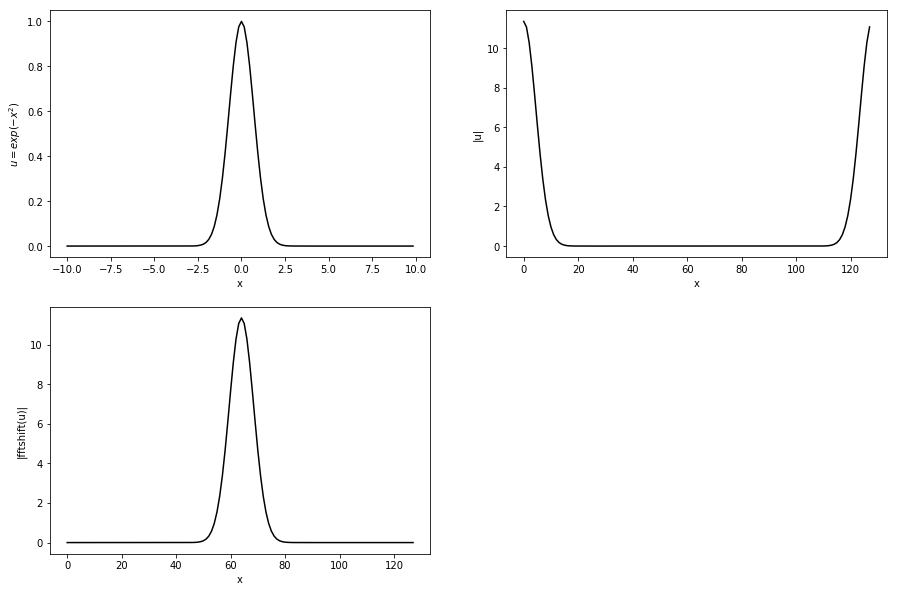

In [3]:
plt.figure(figsize=(15,10))
subplot(2,2,1), plot(x,u,'k') #% plot initial gaussian
ylabel('$u=exp(-x^{2})$')
xlabel('x')
subplot(2,2,2), plot(abs(ut),'k') #% plot unshifted transform
ylabel('|u|')
xlabel('x')
subplot(2,2,3), plot(abs(utshift),'k') #% plot shifted transform
ylabel('|fftshift(u)|')
xlabel('x')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0,'Fourier modes')

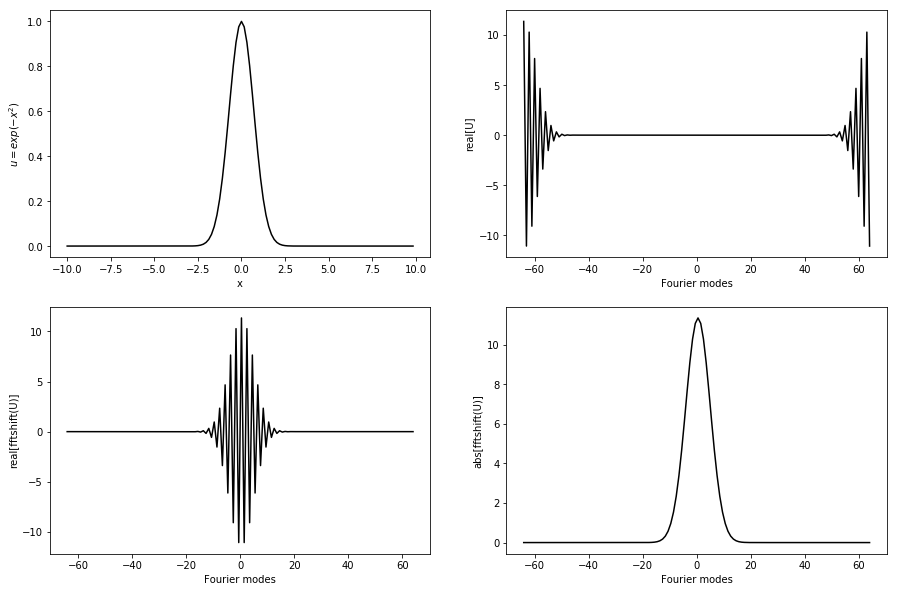

In [4]:
n_1=np.linspace(-n/2,n/2,n)
plt.figure(figsize=(15,10))
subplot(2,2,1),plt.plot(x,u,'k')
ylabel('$u=exp(-x^{2})$')
xlabel('x')
subplot(2,2,2),plt.plot(n_1,ut,'k')
ylabel('real[U]')
xlabel('Fourier modes')
subplot(2,2,3),plt.plot(n_1,utshift,'k')
ylabel('real[fftshift(U)]')
xlabel('Fourier modes')
subplot(2,2,4),plt.plot(n_1,abs(utshift),'k')
ylabel('abs[fftshift(U)]')
xlabel('Fourier modes')

### Ejemplo 12.2: FFT versus Finite-Difference Differentiation

Este ejemplo nos muestra como se puede calcular la primera y segunda derivada de una función utilizando la función FFT, comparando esta con las derivadas calaculadas por diferencias finitas. La función que se deriva es:

$u(x)=sech(x)$

Y las derivadas son:

$\frac{du}{dx}=-sech(x)tanh(x)$

$\frac{d^{2}u}{dx^{2}}=sech(x)-2sech^{3}(x)$

In [5]:
L=20 #% define the computational domain [-L/2,L/2]
n=128 #% define the number of Fourier modes 2^n
x2=np.linspace(-L/2,L/2,n+1) #% define the domain discretization
x=x2[0:n] #% consider only the first n points: periodicity
dx=x[1]-x[0] #dx value needed for finite difference
u=1/(np.cosh(x)) #% function to take a derivative of
ut=np.fft.fft(u) #% FFT the function
k_1=(2*pi/L)*np.linspace(0,n/2-1,n/2)
k_2=(2*pi/L)*np.linspace(-n/2,-1,n/2)
k=concatenate((k_1,k_2)) #% k rescaled to 2pi 

#% FFT calculation of derivatives
ut1=1j*k*ut #% first derivative
ut2=-k*k*ut #% second derivative
u1=np.fft.ifft(ut1).real
u2=np.fft.ifft(ut2).real #% inverse transform
u1exact=-(1/np.cosh(x))*np.tanh(x) #% analytic first derivative
u2exact=(1/np.cosh(x))-2*(1/np.cosh(x))**3 #% analytic second derivative

#% Finite difference calculation of first derivative

#% 2nd-order accurate
ux=[]
ux_1=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux.append(ux_1)

for j in range(1,n-1):
    
    ux_j=(u[j+1]-u[j-1])/(2*dx)
    
    ux.append(ux_j)
    
ux_f=(3*u[-1]-4*u[-2]+u[-3])/(2*dx)
ux.append(ux_f)

#% 4th-order accurate
ux_2=[]
ux2_1=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux_2.append(ux2_1)
ux2_2=(-3*u[1]+4*u[2]-u[3])/(2*dx)
ux_2.append(ux2_2)       
for j in range(2,n-2):
       
    ux2_j=(-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx)
    
    ux_2.append(ux2_j) 
ux2_final_1=(3*u[-2]-4*u[-3]+u[-4])/(2*dx)
ux2_final_2=(3*u[-1]-4*u[-2]+u[-3])/(2*dx)
ux_2.append(ux2_final_1) 
ux_2.append(ux2_final_2)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


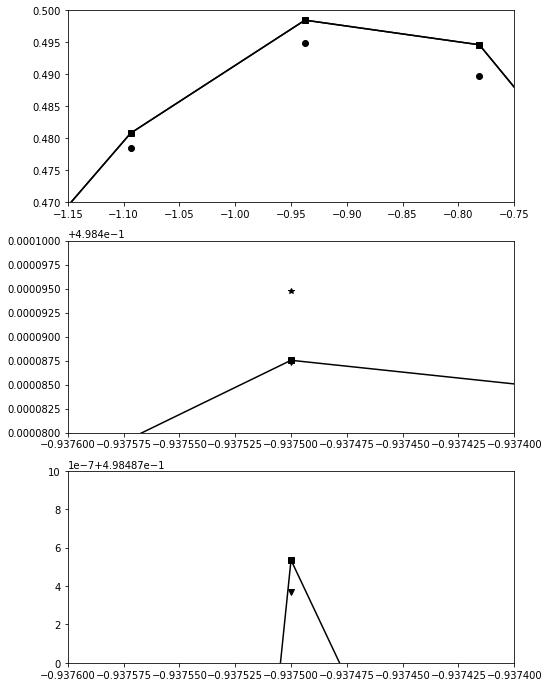

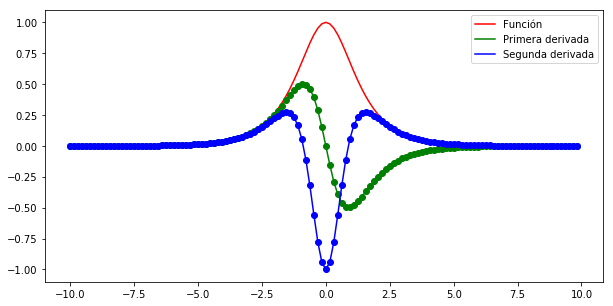

In [6]:
plt.figure(figsize=(8,12))

figure(1)
subplot(3,1,1), plot(x,u1exact,'ks-',x,u1,'k',x,ux,'ko',x,ux_2,'k*')
axis([-1.15, -0.75, 0.47, 0.5])
subplot(3,1,2), plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux_2,'k*')
axis([-0.9376, -0.9374, 0.49848, 0.49850])
subplot(3,1,3), plot(x,u1exact,'ks-',x,u1,'kv',x,ux,'ko',x,ux_2,'k*')
axis([-0.9376, -0.9374, 0.498487, 0.498488])

figure(2)
plt.figure(figsize=(10,5))
plot(x,u,'r',label='Función')
plot(x,u1,'g',label='Primera derivada')
plot(x,u1exact,'go')
plot(x,u2,'b',label='Segunda derivada')
plot(x,u2exact,'bo')
plt.legend(loc='best')

La primera figura es diferencias finitas de segundo orden que esta dentro de ($10^{-2}$) respecto a la solución exacta (linea), la segunda gráfica es de diferencias finitas de cuarto orden, con respecto a la solución exacta está a ($10^{-5}$) y la tarcera gráfica es la derivada con la función FFT la cual da una paroximación de ($10^{-6}$). 

La última gráfica, muestra la función original y la primera y segunda derivada calculadas con FFT.

Luego, se hace el mismo ejercicio pero la función a derivar es $f(x)=tanh(x)$

In [7]:
L=20 #% define the computational domain [-L/2,L/2]
n=128 #% define the number of Fourier modes 2^n
x2=np.linspace(-L/2,L/2,n+1) #% define the domain discretization
x=x2[0:n] #% consider only the first n points: periodicity
dx=x[1]-x[0] #dx value needed for finite difference
u=np.tanh(x) #% function to take a derivative of
ut=np.fft.fft(u) #% FFT the function
k_1=(2*pi/L)*np.linspace(0,n/2-1,n/2)
k_2=(2*pi/L)*np.linspace(-n/2,-1,n/2)
k=concatenate((k_1,k_2)) #% k rescaled to 2pi 

#% FFT calculation of derivatives
ut1=1j*k*ut #% first derivative
u1=np.fft.ifft(ut1).real
u1exact=(1/np.cosh(x))**2#% analytic first derivative

#% 4th-order accurate
ux_2=[]
ux2_1=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux_2.append(ux2_1)
ux2_2=(-3*u[1]+4*u[2]-u[3])/(2*dx)
ux_2.append(ux2_2)       
for j in range(2,n-2):
       
    ux2_j=(-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx)
    
    ux_2.append(ux2_j) 
ux2_final_1=(3*u[-2]-4*u[-3]+u[-4])/(2*dx)
ux2_final_2=(3*u[-1]-4*u[-2]+u[-3])/(2*dx)
ux_2.append(ux2_final_1) 
ux_2.append(ux2_final_2)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


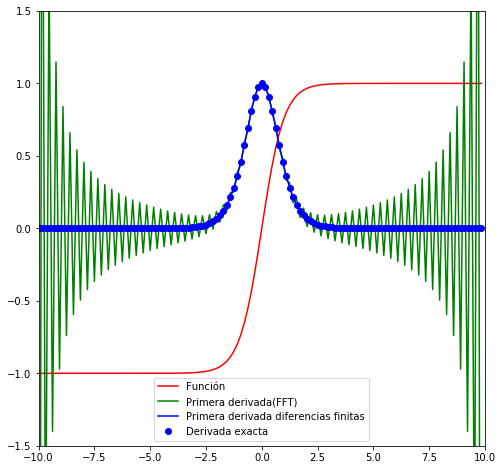

In [8]:
plt.figure(figsize=(8,8))
plot(x,u,'r',label='Función')
plot(x,u1,'g',label='Primera derivada(FFT)')
plot(x,ux_2,'b',label='Primera derivada diferencias finitas')
plot(x,u1exact,'bo',label='Derivada exacta')
axis([-10, 10, -1.5, 1.5])
plt.legend(loc='best')

Los resultados muesran que la derivada con diferencias finitas de orden 4 tiene una diferencia con respecto a la derivada exacta de $(10)^{-5}$, por otr lado la derivada con la función FFT oscila lo que provoca un cálculo inexacto de la derivada, esto se produce debido a que las condiciones de forntera de la función dada no son periodicas. Es decir, que la derivada con FFT funciona bien mientras las condiones de frontera de la función dada sean periodicas, como el caso de $sech(x)$. Por otro lado, diferencias finitas si funcionan bien enlos dos casos.

### Ejemplo 12.3: FFT Application: Radar Detection and Filtering

En este ejemplo lo que se busca es filtrar una señal dada por detector de radares, para lograr detectar una señal. Lo que se hace es considerar una señal ideal y luego agregarle ruido, por ultimo este ruido se filtra utilizando la función FFT.

In [9]:
L=30 #% time slot to transform
n=512 #% number of Fourier modes 2^9
t2=np.linspace(-L,L,n+1)
t=t2[0:n] #% time discretization
k_1=(2*pi/(2*L))*np.linspace(0,n/2-1,n/2)
k_2=(2*pi/(2*L))*np.linspace(-n/2,-1,n/2)
k=concatenate((k_1,k_2))#% frequency components of FFT
u=1/(np.cosh(t))#% ideal signal in the time domain

noise=1
ut=np.fft.fft(u)
utn=ut+noise*(randn(n)+1j*randn(n))
un=np.fft.ifft(utn)

noise_2=2
ut_2=np.fft.fft(u)
utn_2=ut_2+noise_2*(randn(n)+1j*randn(n))
un_2=np.fft.ifft(utn_2)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(-7.5,0.8,'(c)')

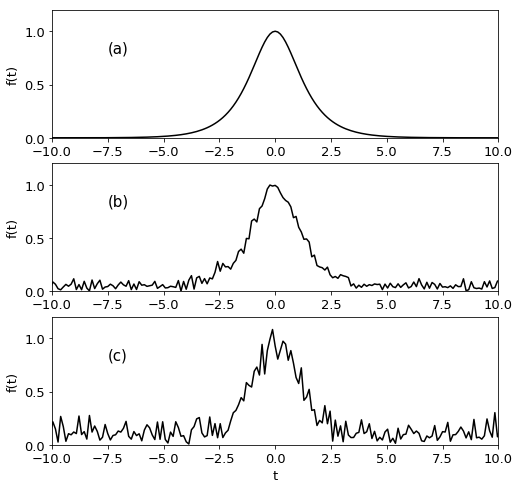

In [10]:
plt.figure(figsize=(8,8))
figure(1)
matplotlib.rcParams.update({'font.size': 13})
subplot(3,1,1), plot(t,u,'k')
axis([-10, 10, 0, 1.2])
ylabel('f(t)')
matplotlib.pyplot.annotate('(a)', xy=(-7.5, 0.8),fontsize=15)
subplot(3,1,2), plot(t,abs(un),'k')
axis([-10, 10, 0, 1.2])
ylabel('f(t)')
matplotlib.pyplot.annotate('(b)', xy=(-7.5, 0.8),fontsize=15)
subplot(3,1,3), plot(t,abs(un_2),'k')
axis([-10, 10, 0, 1.2])
ylabel('f(t)')
xlabel('t')
matplotlib.pyplot.annotate('(c)', xy=(-7.5, 0.8),fontsize=15)

En la figura se muestra (a) un pulso ideal en dominio de tiempo, y (b) y (c) son copias del puso incrementando el ruido blanco aplicado.

Luego, se aplica un ruido de 10 de tal manera que la señal quede totalmente oculta entre el ruido, y de esta manera aplicar el filtro. 

(Text(0.5,0,'wavenumber (k)'), Text(0,0.5,'|ut|/max(|ut|)'))

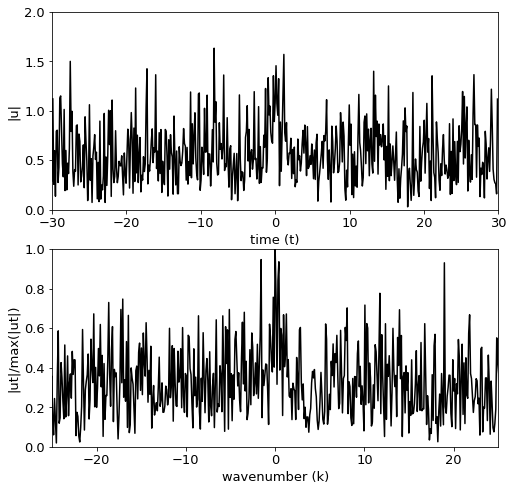

In [11]:
noise_3=10
ut_3=np.fft.fft(u)
unt_3=ut_3+noise_3*(randn(n)+1j*randn(n))
un_3=ifft(unt_3)
plt.figure(figsize=(8,8))
matplotlib.rcParams.update({'font.size': 13})
subplot(2,1,1), plot(t,abs(un_3),'k')
axis([-30, 30, 0, 2])
xlabel('time (t)'), ylabel('|u|')
subplot(2,1,2)
plot(fftshift(k),abs(fftshift(unt_3))/max(abs(fftshift(unt_3))),'k')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)'), ylabel('|ut|/max(|ut|)')

Para la aplicación del radar la frecuencia del campo emitido y reflejado es conocida, el filtrado alrededor de esta frecuencia puede eliminar las frecuencias no deseadas y el ruido blanco añadido, en este problema se va a utilizar un flitro gaussiano:

$F(k)=exp(-\tau (k-k_{0})^{2})$

Donde $\tau$ mide el ancho de la banda del filtro y $k$ es el número de onda, el filtro elimina las altas frecuencias:

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(Text(0.5,0,'time (t)'), Text(0,0.5,'|u|'))

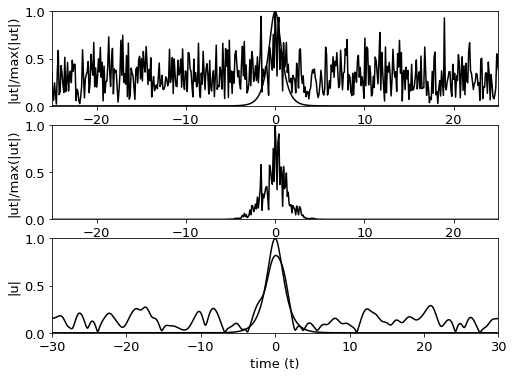

In [12]:
filter=exp(-0.2*(k)**2)
unft=filter*unt_3
unf=ifft(unft)
plt.figure(figsize=(8,8))
subplot(4,1,1)
plot(fftshift(k),abs(fftshift(unt_3))/max(abs(fftshift(unt_3))),'k')
plot(fftshift(k),abs(fftshift(ut))/max(abs(fftshift(ut))),'k')
xlabel('wavenumber (k)'), ylabel('|ut|/max(|ut|)')
axis([-25, 25, 0, 1])
subplot(4,1,2)
plot(fftshift(k),abs(fftshift(unft))/max(abs(fftshift(unft))),'k')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)'), ylabel('|ut|/max(|ut|)')
subplot(4,1,3), plot(t,abs(unf),'k')
subplot(4,1,3), plot(t,abs(u),'k')
axis([-30, 30, 0, 1])
xlabel('time (t)'), ylabel('|u|')


En la figura se muestra erriba la señal con ruido en el dominio de frecuencia con el filtro gaussiano ($\tau=0.2$) centrado en la frecuacnia central de la señal, en la figura del medio se muestra la señal filtrada en el dominio de frecuencia, por último, al final se muestra la señal filtrada en el dominio del tiempo con la señal ideal.

(Text(0.5,0,'time (t)'), Text(0,0.5,'|u|'))

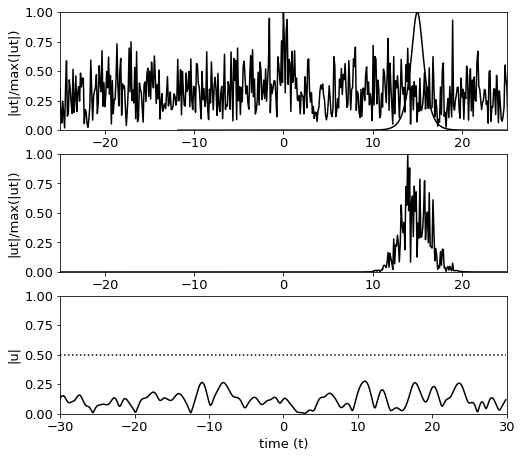

In [13]:
filter=exp(-0.2*(k-15)**2)
unft_1=filter*unt_3
unf_1=ifft(unft_1)
plt.figure(figsize=(8,10))
subplot(4,1,1)
plot(fftshift(k),abs(fftshift(unt_3))/max(abs(fftshift(unt_3))),'k')
plot(fftshift(k+15),abs(fftshift(ut))/max(abs(fftshift(ut))),'k')
xlabel('wavenumber (k)'), ylabel('|ut|/max(|ut|)')
axis([-25, 25, 0, 1])
subplot(4,1,2)
plot(fftshift(k),abs(fftshift(unft_1))/max(abs(fftshift(unft_1))),'k')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)'), ylabel('|ut|/max(|ut|)')
subplot(4,1,3), plot(t,abs(unf_1),'k')
plot(t,np.zeros(n)+0.5,'k:',[2])
axis([-30, 30, 0, 1])
xlabel('time (t)'), ylabel('|u|')

En este caso se utiliza una filtro centrado en $k_{0}=15$, en este caso no hay señal alrededor de $k_{0}=15$ pero si hay mucho ruido blanco, en la ultima gráfica se puede ver que no hay un objetivo disernible posible. el umbral de decisión es de |u|=0.5 y las fluctiaciones de ruido blanco estan muy por debajo de este.

### Ejemplo 12.4: FFT Application: Radar Detection and Averaging

Para eliminar el ruido tambien se puede promediar, que es lo que se hace en el siguiente ejemplo:

In [14]:
L=30 #% time slot
n=512 #% Fourier modes
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
k_1=(2*pi/(2*L))*np.linspace(0,n/2-1,n/2)
k_2=(2*pi/(2*L))*np.linspace(-n/2,-1,n/2)
k=concatenate((k_1,k_2))
ks=fftshift(k)
noise=10

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


En esta parte del codigo se define el némero de realizaciones, en este caso se tiene 1, 2 5 y 100.

Text(0.5,0,'frequency (k)')

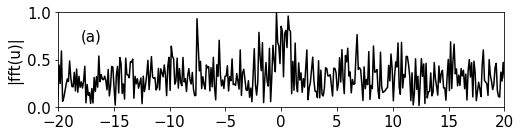

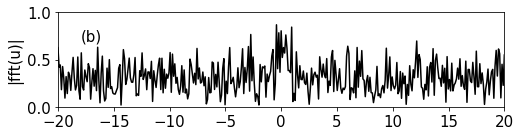

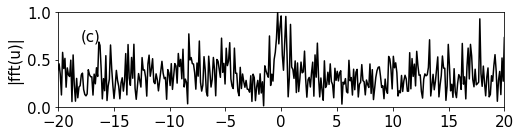

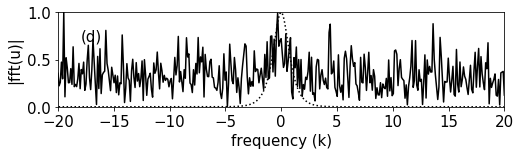

In [15]:
labels=np.array(['(a)','(b)','(c)','(d)'])
realize=np.array([1, 2, 5, 100])
utn=[]
lon=[]
for jj in range(0,len(realize)):
    un=[]
    dat=[]
    u=(1/cosh(t))
    ave=np.zeros(n)
    ut=np.fft.fft(u)
    utn_j=ut+noise*(randn(n)+1j*randn(n))
    
    while len(utn) < realize[jj]:
        utn.append(utn_j)
    

    for i in range(0,realize[jj]):
        
        ave=ave+utn[i]
        un_1=ifft(utn[i])

        un.append(un_1)
        dat_1=abs(fftshift(utn[i]))/max(abs(utn[i]))

        dat.append(dat_1)
        
        ave=abs(fftshift(ave))/realize[jj]

    plt.figure(figsize=(8,8))
    matplotlib.rcParams.update({'font.size': 15})
    subplot(4,1,jj+1)
    plot(ks,ave/(max(ave)),'k')
    axis([-20, 20, 0, 1])
    matplotlib.pyplot.annotate(labels[jj], xy=(-18, 0.7),fontsize=15)
    plt.ylabel('|fft(u)|', fontsize=15)
    
plot(ks,abs(fftshift(ut))/max(abs(ut)),'k:')
matplotlib.rcParams.update({'font.size': 15})
plt.xlabel('frequency (k)')


Contenido espectral promedio para (a) uno, (b) dos, (c) cinco y (d) cien realizaciones de los datos. La línea de puntos en (d) representa el ideal,forma espectral sin ruido.

In [16]:
from mpl_toolkits.mplot3d import axes3d

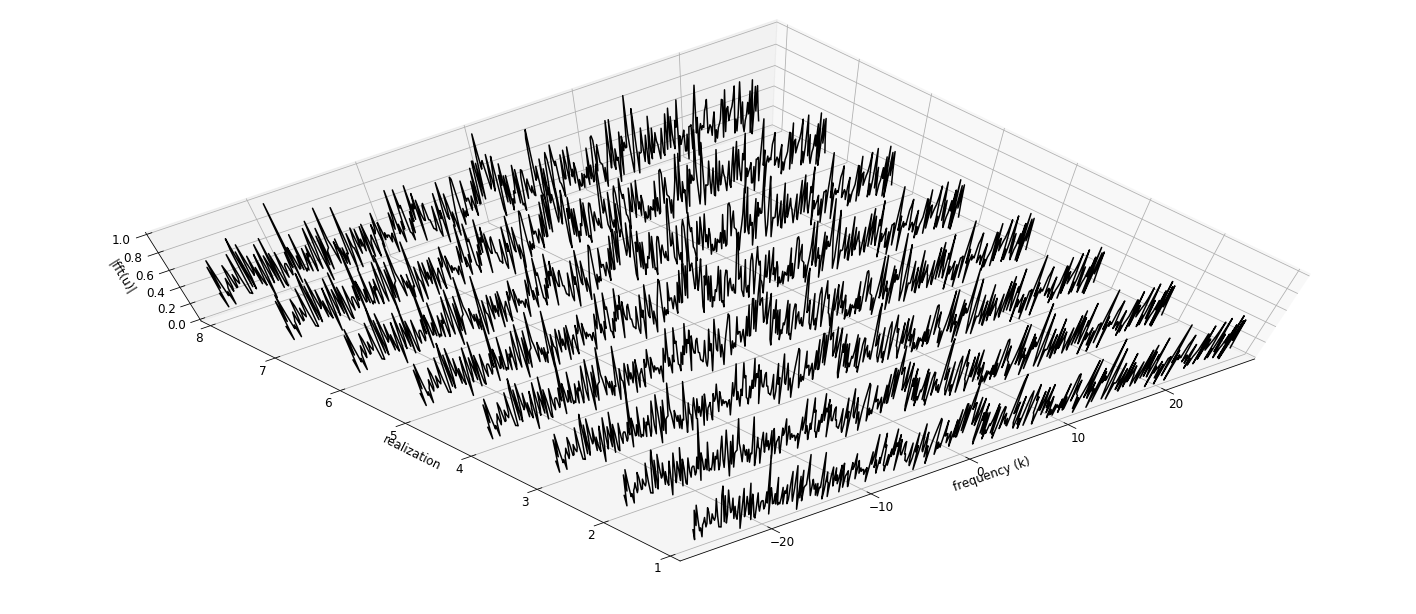

In [17]:
fig = plt.figure(figsize=(25,24))
mpl.rcParams['font.size'] = 12
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.set_xlabel('frequency (k)')
ax.set_ylabel('realization')
ax.set_zlabel('|fft(u)|')
ax.set_xlim(-28,28)
ax.set_ylim(1,8)
ax.set_zlim(0,1)
for a in range(0,8):
    X=ks
    Y=np.zeros(n)+(a+1)
    Z=dat[i]

    ax.plot(X,Y,Z,color='k')
ax.view_init(75,230)

Esta gráfica muestra como entre más realizaciones el proceso de promediar puede extraer un exprecto limpio, sin mebargo, se pierde por completo la dinamica en el dominio del tiempo, como se muestra e la siguiente figura:

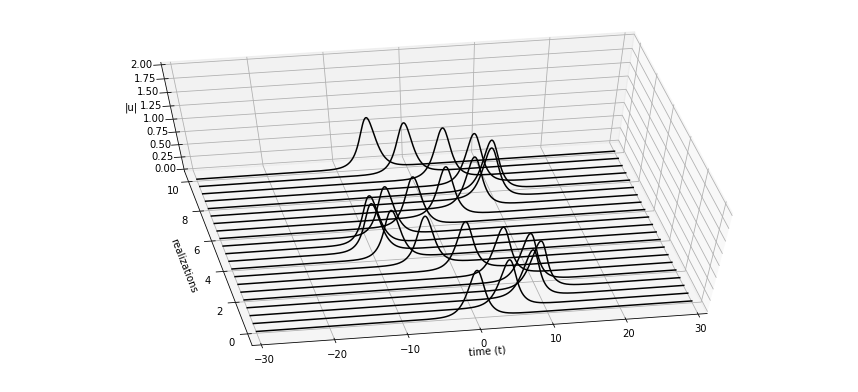

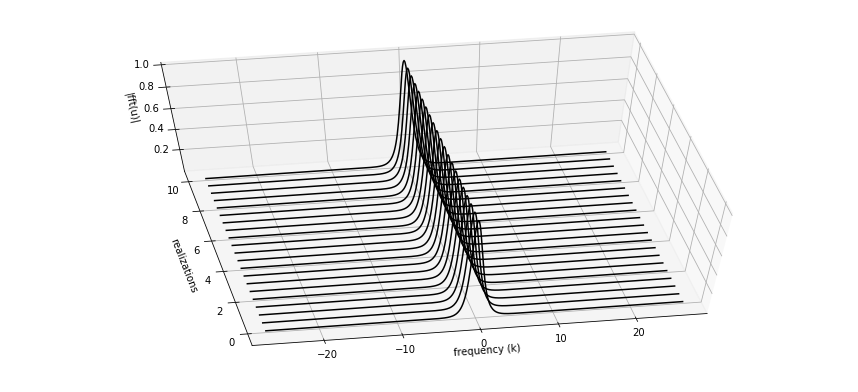

In [18]:
fig_1 = plt.figure(figsize=(15,15))
mpl.rcParams['font.size'] = 10
ax_1 = fig_1.add_subplot(2, 1, 1, projection='3d')
slice=np.linspace(0,10,21)
[T,S]=np.meshgrid(t,slice)
[K,S]=np.meshgrid(k,slice)
U=1/cosh((T-10*sin(S)))*exp(i*0*T)
ax_1.set_xlabel('time (t)')
ax_1.set_ylabel('realizations')
ax_1.set_zlabel('|u|')
ax_1.set_xlim(-30,30)
ax_1.set_zlim(0,2)
for b in range(0,len(slice)):
    X_1=T[b]
    Y_1=S[b]
    Z_1=U[b]

    ax_1.plot(X_1,Y_1,Z_1,color='k')
ax_1.view_init(60,260)

Ut=[]
Kp=[]
Utp=[]
Utn=[]
Utnp=[]
Un=[]
for j in range (0,len(slice)):
    Ut_1=np.fft.fft(U[j])
    Ut.append(Ut_1)
    Kp_1=fftshift(K[j])
    Kp.append(Kp_1)
    Utp_1=fftshift(Ut[j])
    Utp.append(Utp_1)
    Utn_1=Ut[j]+noise*(randn(n)+1j*randn(n))
    Utn.append(Utn_1)
    Utnp_1=fftshift(Utn[j])/max(abs(Utn[j]))
    Utnp.append(Utnp_1)
    Un_1=ifft(Utn[j])
    Un.append(Un_1)

fig_2 = plt.figure(figsize=(15,15))
mpl.rcParams['font.size'] = 10
ax_2 = fig_2.add_subplot(2, 1, 2, projection='3d')
ax_2.set_xlabel('frequency (k)')
ax_2.set_ylabel('realizations')
ax_2.set_zlabel('|fft(u)|')
ax_2.set_xlim(-28,28)
for b in range(0,len(slice)):
    X_2=Kp[b]
    Y_2=S[b]
    Z_2=abs(Utp[b])/max(abs(Utp[0]))

    ax_2.plot(X_2,Y_2,Z_2,color='k')
ax_2.view_init(60,260)

En la figura se muestra el comportamiento ideal de tiempo y frecuencia, para un pulso en el dominio del tiempo que evoluciona dinamicamante con el tiempo. La firma espectral permanece sin cambios a medida que el pulso se mueve en el dominio del tiempo.

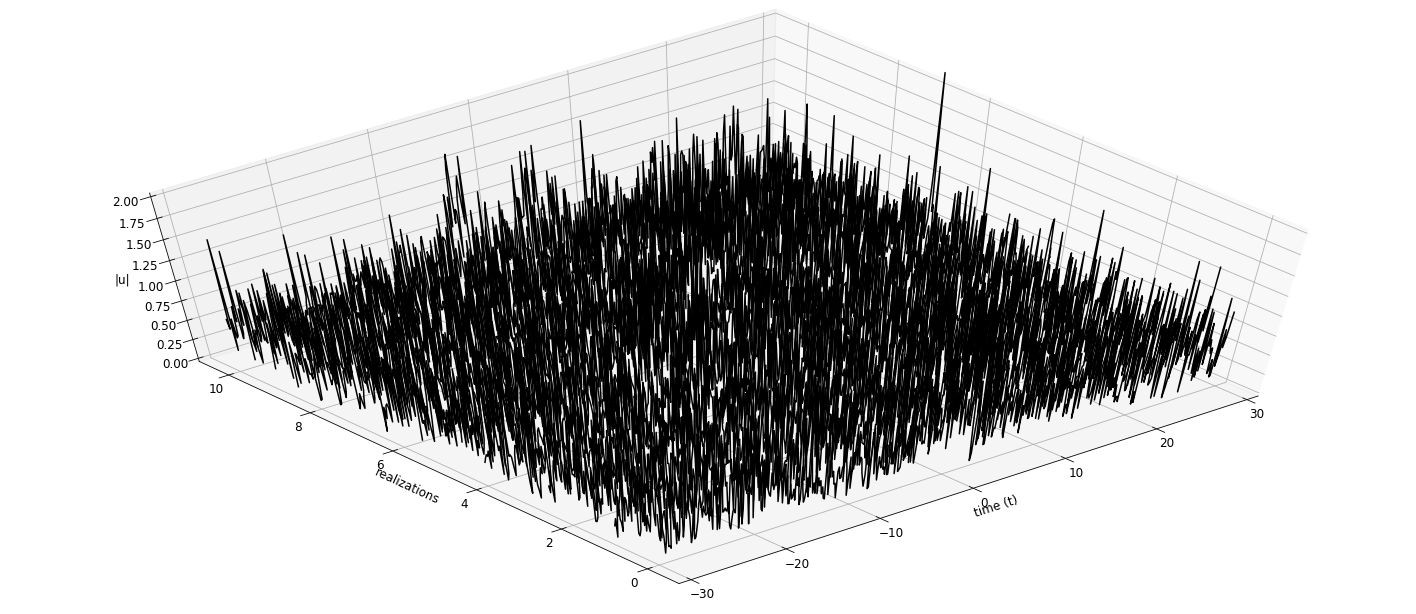

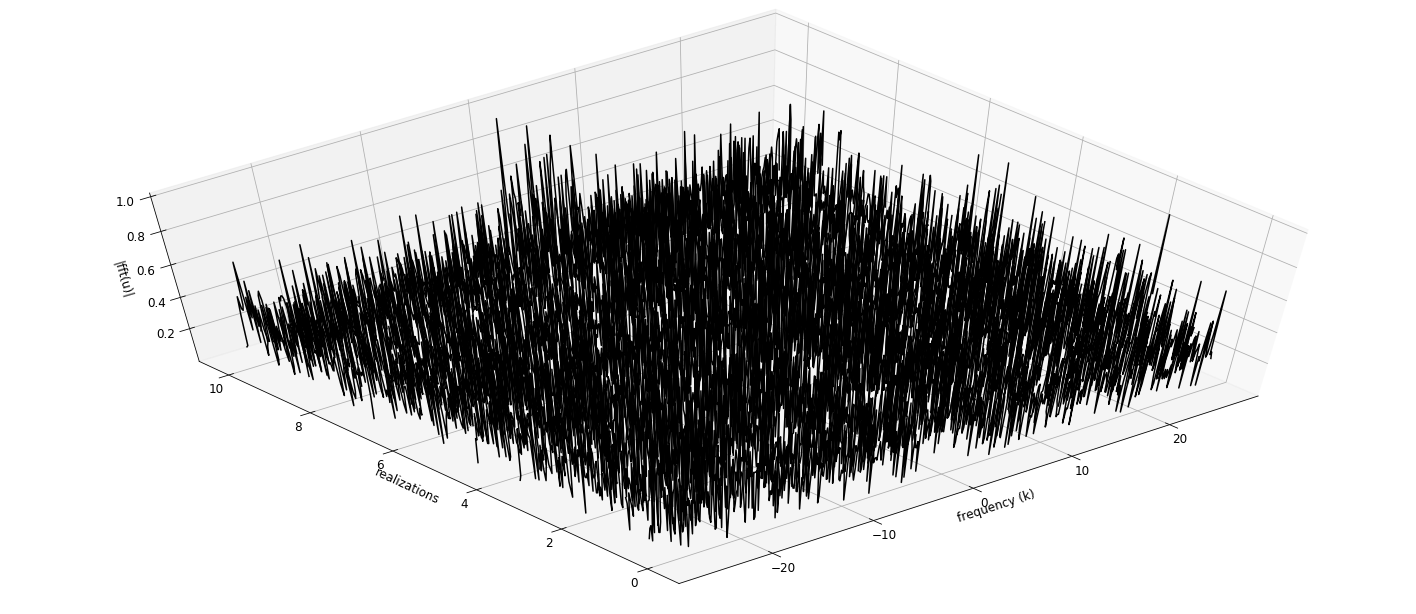

In [19]:
fig_3 = plt.figure(figsize=(25,24))
mpl.rcParams['font.size'] = 12
ax_3 = fig_3.add_subplot(2, 1, 1, projection='3d')
ax_3.set_xlabel('time (t)')
ax_3.set_ylabel('realizations')
ax_3.set_zlabel('|u|')
ax_3.set_xlim(-30,30)
ax_3.set_zlim(0,2)
for b in range(0,len(slice)):
    X_3=T[b]
    Y_3=S[b]
    Z_3=abs(Un[b])

    ax_3.plot(X_3,Y_3,Z_3,color='k')

ax_3.view_init(60,230)

fig_4 = plt.figure(figsize=(25,24))
mpl.rcParams['font.size'] = 12
ax_4 = fig_4.add_subplot(2, 1, 2, projection='3d')
ax_4.set_xlabel('frequency (k)')
ax_4.set_ylabel('realizations')
ax_4.set_zlabel('|fft(u)|')
ax_4.set_xlim(-28,28)
for b in range(0,len(slice)):
    X_4=Kp[b]
    Y_4=S[b]
    Z_4=abs(Utnp[b])

    ax_4.plot(X_4,Y_4,Z_4,color='k')
ax_4.view_init(60,230)

La evolución del pulso ideal se inunda con ruido blanco como se muestra en la anterior figura.

Luego se promedian las 21 realizaciones de datos en el dominio del tiempo y el de frecuencia:

(Text(0.5,0,'frequency (k)'), Text(0,0.5,'|fft(u)|'))

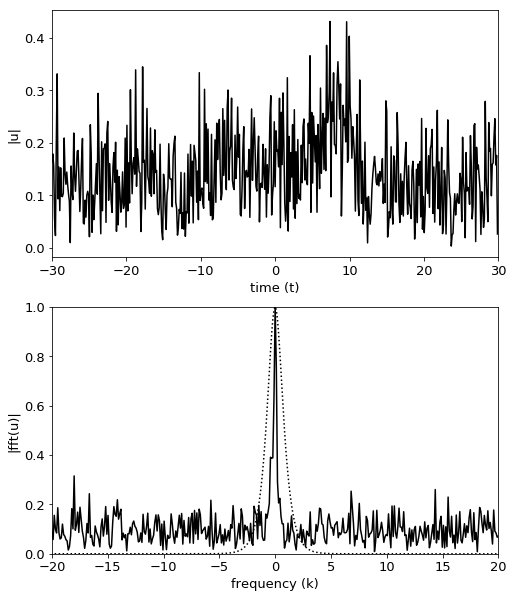

In [20]:
Uave=np.zeros(n) 
Utave=zeros(n)
for j in range(0,len(slice)):
    
    Uave=Uave+Un[j]
    Utave=Utave+Utn[j]
    
Uave=Uave/len(slice)
Utave=fftshift(Utave)/len(slice)
plt.figure(figsize=(8,10))
matplotlib.rcParams.update({'font.size': 13})
subplot(2,1,1)
plot(t,abs(Uave),'k')
xlabel('time (t)'), ylabel('|u|')
xlim(-30,30)
subplot(2,1,2)
plot(ks,abs(Utave)/max(abs(Utave)),'k')
plot(ks,abs(fftshift(Ut[0])/max(abs(Ut[0]))),'k:',[2])
axis([-20, 20, 0, 1])
xlabel('frequency (k)'), ylabel('|fft(u)|')

La figura muestra el resutado de promediar una señal no estacionaria, la primera figura muestra que el promediar en el dominio del tiempo no produce una señal visible. Sin embargo, promediar en el dominio de frecuencia produce uan clara señal en la frecuencia central de interes, entre más datos se tengan mejor señal de promedio será producida.

### Ejemplo propio

En este ejemplo se filtrara una voz emitida por un radio.

Para esto primero se lee el archivo wav.

In [21]:
import wave
import sys

In [22]:
wave.open('Sonido_2.wav','r')

In [23]:
from scipy.io import wavfile

In [24]:
samplerate, data = wavfile.read('Sonido_2.wav')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [25]:
times = np.arange(len(data))/float(samplerate)
time=times[0:200000]
data_1=data[0:200000]

Text(0,0.5,'u')

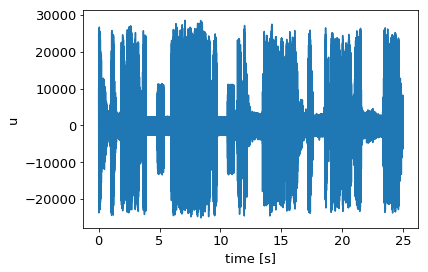

In [26]:
plt.plot(time, data_1)
xlabel('time [s]')
ylabel('u')

Luego se hace una gráfica de frecuencias del archivo wav.

In [27]:
frecuencia=np.fft.fft(data_1)

Text(0,0.5,'|fft(u)|')

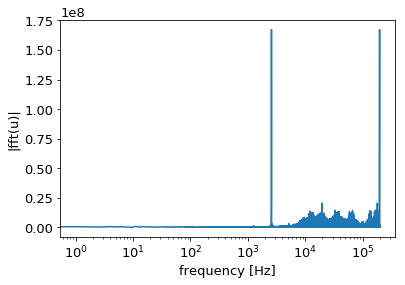

In [28]:
plt.semilogx()
plt.plot(abs(frecuencia))
xlabel('frequency [Hz]')
ylabel('|fft(u)|')

En la anterior gráfica podemos ver como hay dos frecuencias en especifico que tiene picos muy altos, estas frecuancias se eliminaran para filtrar el sonido.

In [29]:
frecuencia[0:4000]=0
frecuencia[100000:len(data_1)]=0

Text(0,0.5,'|fft(u)|')

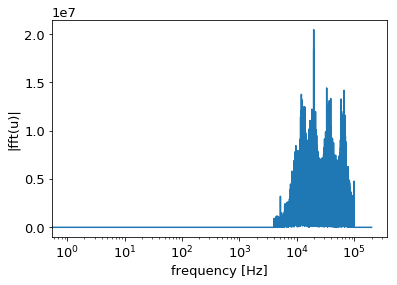

In [46]:
plt.semilogx()
plt.plot(abs(frecuencia))
xlabel('frequency [Hz]')
ylabel('|fft(u)|')

Luego de eliminarlas se realiza la transformada de fourier inversa para obtener de nuevo la onda filtrada.

In [31]:
filtrada=ifft(frecuencia)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'u')

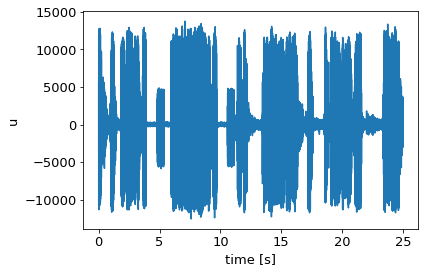

In [32]:
plt.plot(time, filtrada)
xlabel('time [s]')
ylabel('u')